# Water Quality Explanatory Data Analysis

## What will you learn from this project?
* Bivariate and multivariate data analysis
* Correlation analysis
* Preprocessing: missing value, train-test split and normalization
* Modelling: Decision Tree and Random Forest Classifiers
* Visualize Decision Tree
* Random Forest Hyperparameter Tuning

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Dependent Variable Analysis](#4)
1. [Correlation Between Features](#5)
1. [Distribution of Features](#6)
1. [Preprocessing: Missing Value Problem](#7)
1. [Preprocessing: Train-Test Split and Normalization](#8)
1. [Modelling: Decision Tree and Random Forest Classifiers](#9)
1. [Visualize Decision Tree](#10)
1. [Random Forest Hyperparameter Tuning](#11)
1. [Conclusion](#12)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn import tree

## Data Content
1. **pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
2. **Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
3. **Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
4. **Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
5. **Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
6. **Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.
7. **Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
8. **Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
9. **Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.
10. **Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## 1-Read and Analyse Data

In [2]:
df = pd.read_csv("data/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.describe() # ph 14 olan su değil baz.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## 2-Visualize Data
### A) Dependent Variable Analysis 

In [5]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [6]:
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values = "Potability", names = ["Not Potable", "Potable"], hole = 0.35, opacity = 0.8,
            labels = {"label" :"Potability", "Potability": "Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

### B) Correlation Between Features

In [7]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


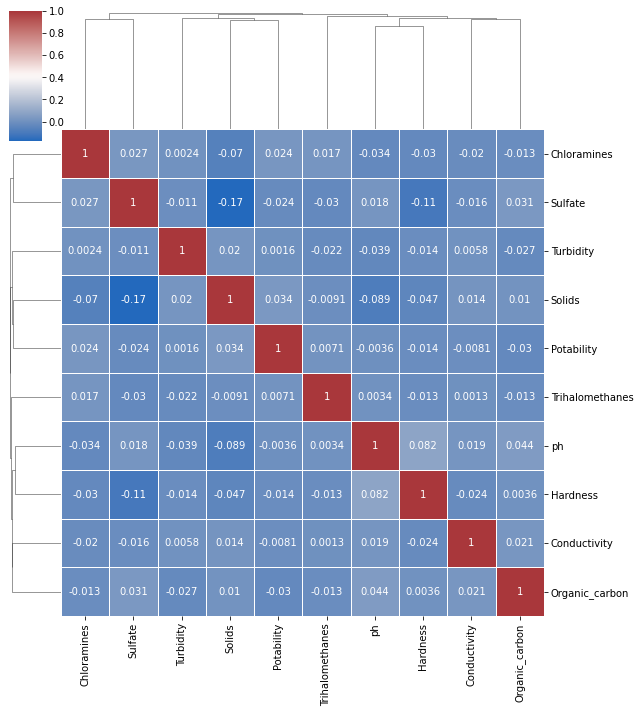

In [8]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

Yukarıdaki plota göre:
- baskın gelen feature yok. Yani **Potability** ye doğrudan etkisi olan dependent veri yok. 
- bu iyi ama biraz zor bir durum çünkü, her feature u kullanarak bir modelleme yapılabilicek. 3-4 feature'a bağımlı kalmak aslında hoş bir durum değil.

### C) Distribution of Features

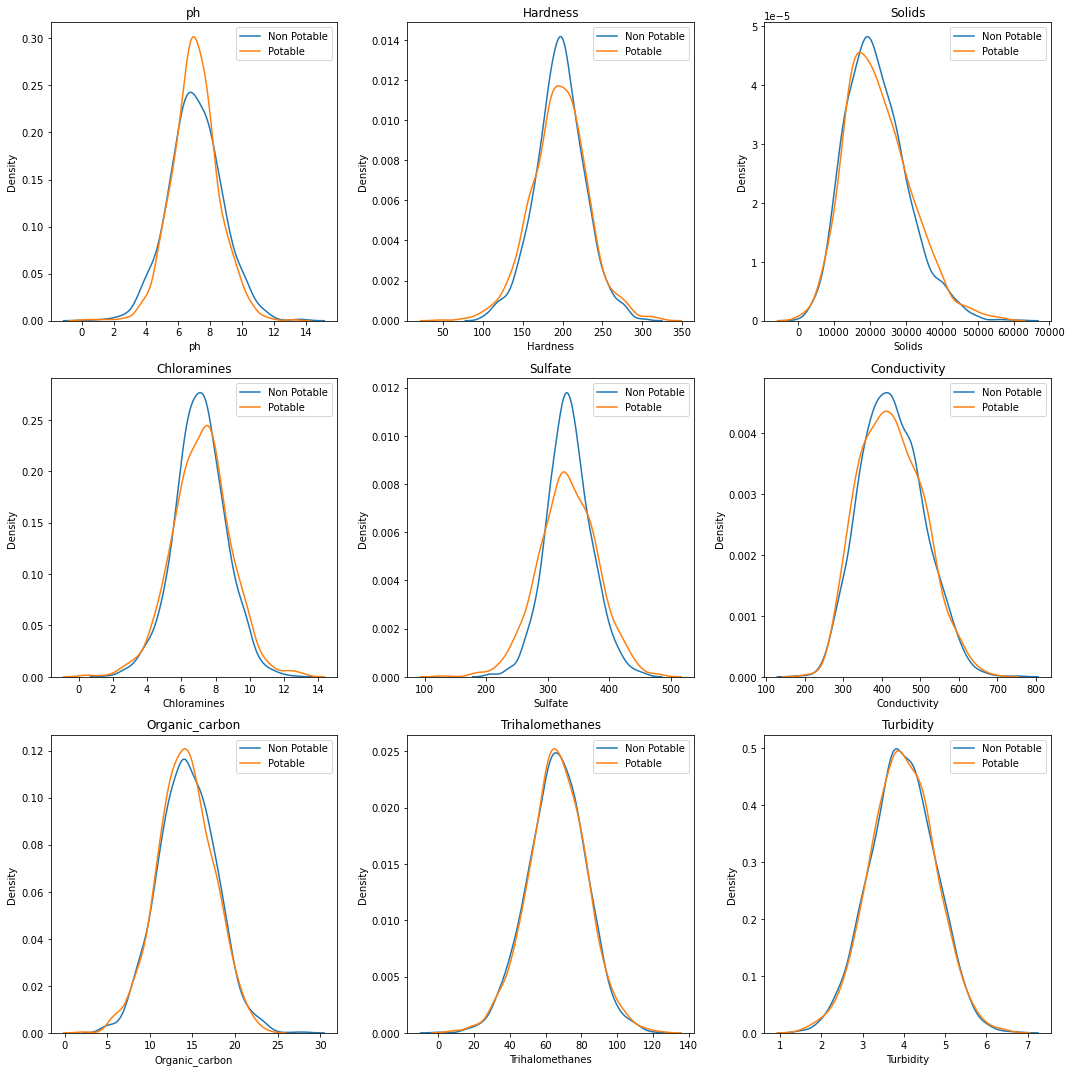

In [9]:
non_potable = df.query("Potability == 0") # filter or where condition
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]): # Potability'yi dahil etmemize gerek yok.
    plt.subplot(3, 3, ax + 1) #if y=2 ise x=1 and y=0 yap gibi şeyler dememize gerek yok. otomatik subplotları oluşturacak.
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

Yukarıdaki plota göre çok fazla farklılık görülememektedir.

## 3) Preprocessing 
### A) Missing Value Problem

In [10]:
df.isna().sum() # missing values

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

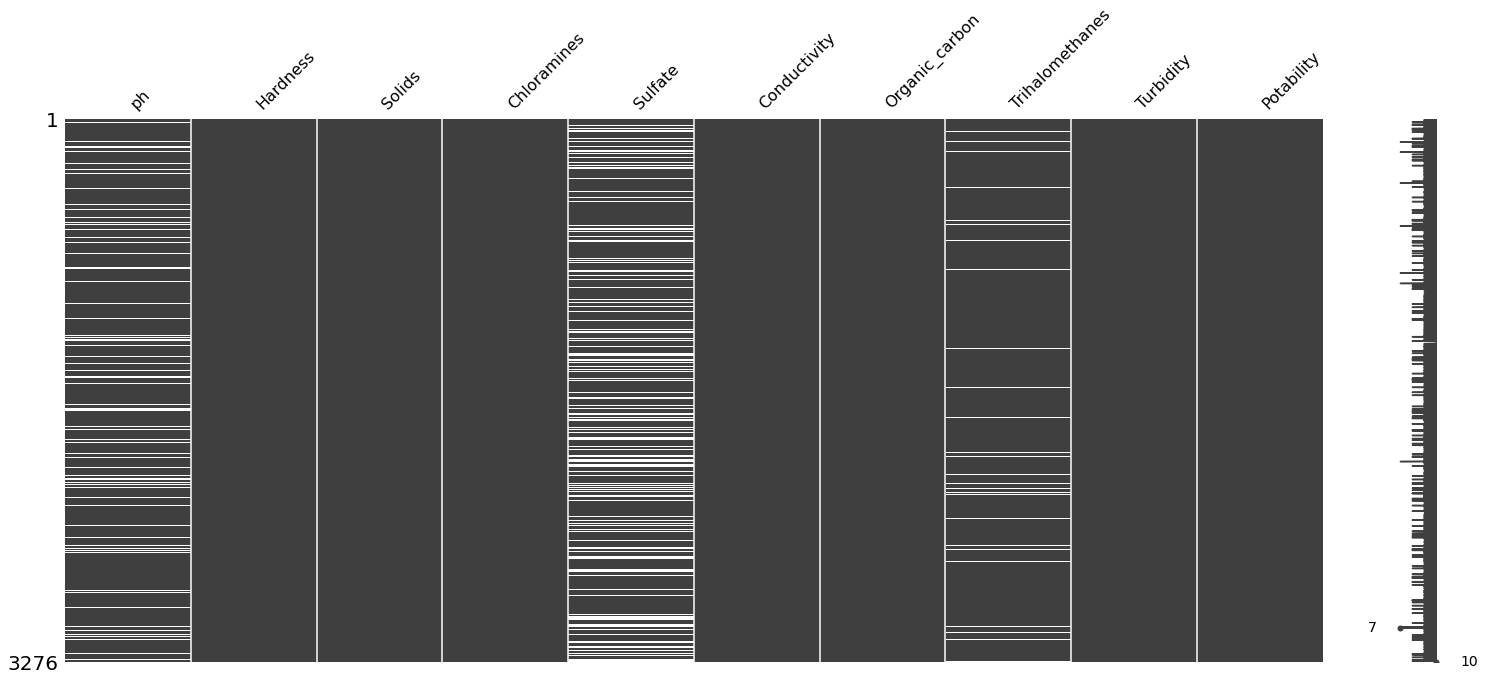

In [11]:
msno.matrix(df)
plt.show()

### Note
- Veriyi doldurmak için **"Distribution of Features"** plota bakarak ortalamasına göre doldururuz. 
- O plot üzerinde mean değişmeyecek ancak density artacaktır, bu çok fazla problem değil. 

In [12]:
# handle missing value with average of features
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

### B) Train-Test Split

In [13]:
X = df.drop("Potability", axis = 1).values  # values=convert pandas.series to numpy array
y = df["Potability"].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (2293, 9)
X_test (983, 9)
y_train (2293,)
y_test (983,)


### C) min-max normalization

#### Note
- **test verisini** de **train** verisine göre normalize yaparız!! :)

In [15]:
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min) # convert=> 0-1 min-max
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

## 3) Create Model: Decision Tree and Random Forest Classifiers
* Precision Score: The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
* The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
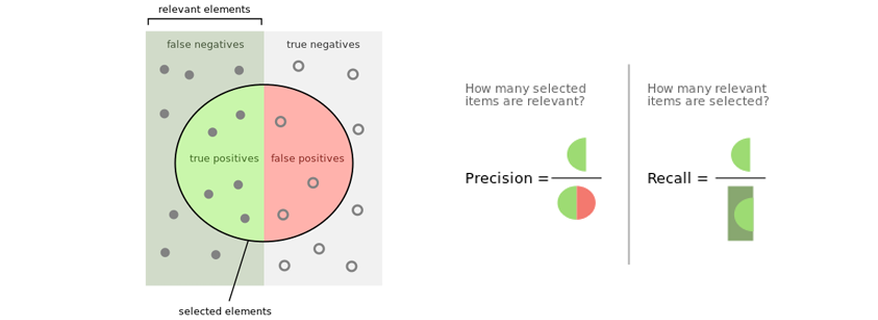
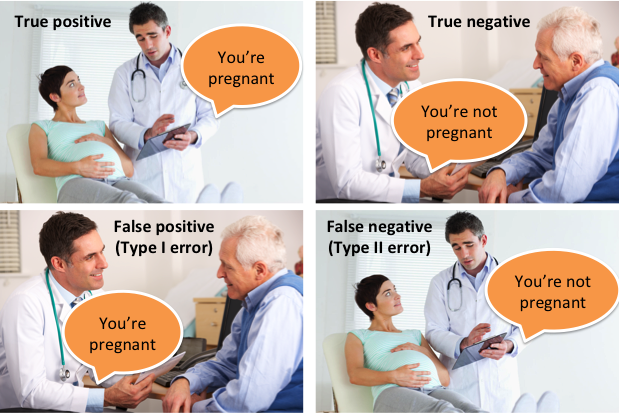

In [23]:
models = [("DTC", DecisionTreeClassifier(max_depth = 3)),
          ("RF", RandomForestClassifier())]

In [26]:
finalResults = []
cmList = []
for name, model in models:
    model.fit(X_train, y_train) # train
    model_result = model.predict(X_test) # prediction => model_result=y_pred
    score = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)
    
    finalResults.append((name, score))
    cmList.append((name, cm))
finalResults

[('DTC', 0.72), ('RF', 0.6262626262626263)]

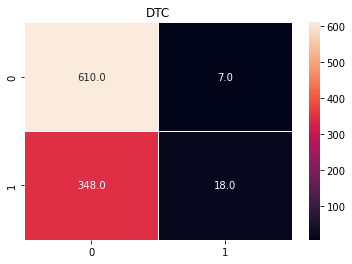

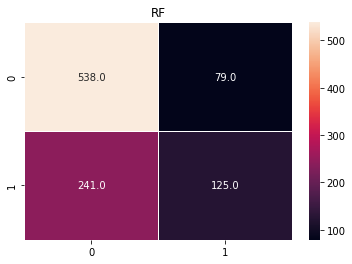

In [25]:
for name, i in cmList:
    plt.figure()
    sns.heatmap(i, annot = True, linewidths = 0.8, fmt = ".1f")
    plt.title(name)
    plt.show()

## 4) Visualize Decision Tree
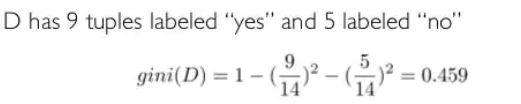

In [27]:
models[0]

('DTC', DecisionTreeClassifier(max_depth=3))

In [19]:
dt_clf = models[0][1]
dt_clf

DecisionTreeClassifier(max_depth=3)

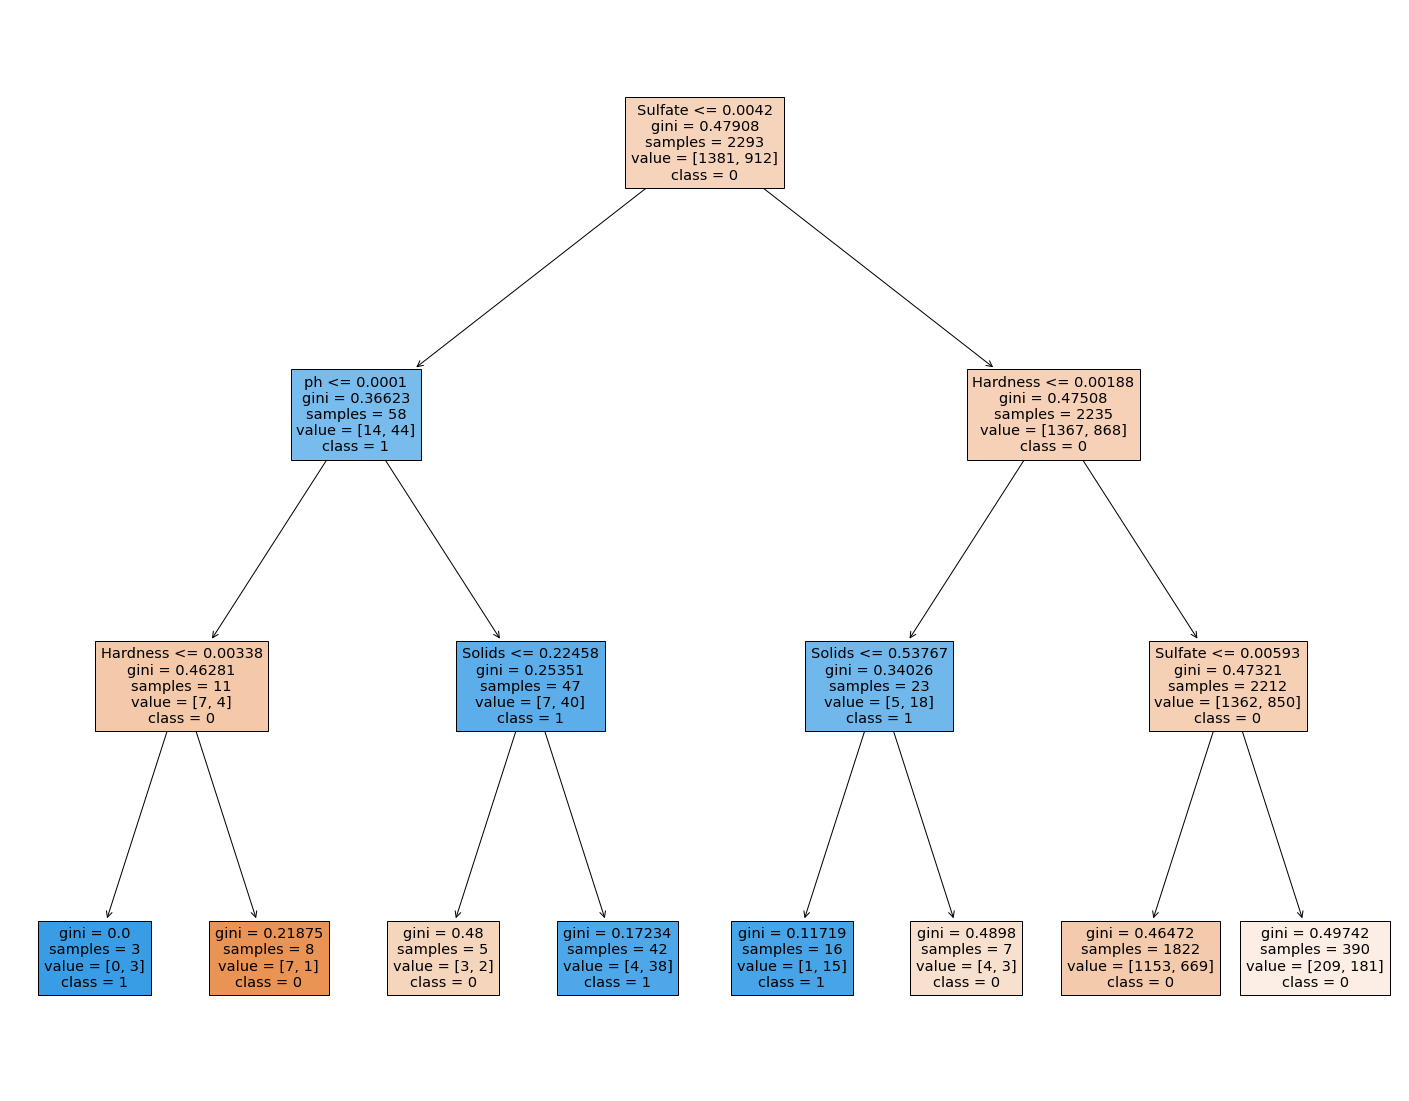

In [31]:
plt.figure(figsize = (25,20))
tree.plot_tree(dt_clf, # plot_tree = list kabul ediyor.
               feature_names =  df.columns.tolist()[:-1], # potability hariç
               class_names = ["0", "1"], # Potable and Not Potable
               filled = True,
               precision = 5)
plt.show()

Yukarıdaki plota göre:
- Sulfate'ın değeri 0.0042'den küçükse class 1, büyükse class 0
- samples = 2293 => X_traindeki sample sayısı
- value => 1381 tanesi class 0, 912 tanesi class 1
- İkinci ana feature Solids dir.
- Dept=3 olduğu için 3 kere dallanmaktadır. arttığında daha da iyi train eder.
- **Gini** 0'a ne kadar yakınsa o kadar doğru tahmin yapılıyor demektir.

In [33]:
1- (209/(209+181))**2 - (181/(209+181))**2 # Yukarıdaki tree de sağ alttaki leaf'in gini değeri bu şekilde hesaplanıyor.

0.497422748191979

## 5-Random Forest Hyperparameter Tuning

### Note
Dictionary'de rasgele örneğin SVM algoritmasını da ekleyebiliriz. RandomSearchCV onu da ekleyip karşılaştıracaktır! :)

In [34]:
model_params = { # dict
    "Random Forest":
    {
        "model": RandomForestClassifier(),
        "params":
        {
            "n_estimators": [10, 50, 100], # 10 tane, 50 tane ve 100tane DT olsun.
            "max_features": ["auto", "sqrt", "log2"], # hesaplama yapılırken kullanılıyor
            "max_depth": list(range(1,21,3)) # 3 er 3 er artsın
        }
    } 
    # SVM algoritmasını da ekleyebiliriz. RandomSearchCV onu da ekleyip karşılaştıracaktır.
}
model_params

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13, 16, 19]}}}

### Note
Cv de otomatik olarak birden fazla kez split yapacaktır. örneğin 4 tanesini train 1 tanesini test olacak şekilde.

In [35]:
# bir %90 bir %60 accuracy çıkmaması için cv kullanıyoruz. 
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 2) # cross Validation => 5'e bölecek, 2 kez tekrar edecek(2 kez yapacak)
scores = []
for model_name, params in model_params.items():
    rs = RandomizedSearchCV(params["model"], params["params"], cv = cv, n_iter = 10) # RandomSearch değerleri random kullanarak search ediyor, deniyor.
    rs.fit(X, y)
    scores.append([model_name, dict(rs.best_params_),rs.best_score_]) # birden fazla modeli deneyebiliriz! :)
scores

[['Random Forest',
  {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 16},
  0.6756707317073171]]